# Heart disease Prediction

**Industry :Healthcare & Life Sciences**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [136]:
#importing all the necessary files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [137]:
#Loading the heart dataset
heart_df = pd.read_csv("/content/drive/MyDrive/heart.csv")
heart_df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1



**About Dataset**

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]



In [138]:
#displaying random 5 samples
heart_df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
607,53,M,ASY,144,300,1,ST,128,Y,1.5,Flat,1
728,54,F,NAP,135,304,1,Normal,170,N,0.0,Up,0
650,48,M,ASY,130,256,1,LVH,150,Y,0.0,Up,1
223,33,M,NAP,120,298,0,Normal,185,N,0.0,Up,0
137,39,M,ATA,120,241,0,ST,146,N,2.0,Up,0


In [139]:
#Getting dataset summary
heart_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [140]:
#Getting dataset statistics
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [141]:
heart_df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


# **Data  Preprocessing**

In [142]:
#checking the null values
heart_df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [143]:
#checkinh the duplicates
heart_df.duplicated().sum()

0

In [144]:
#checking the number of unique values in each feature
heart_df.nunique()

,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


In [145]:
heart_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [146]:
categorical_col= heart_df.select_dtypes(include='object').columns
categorical_col

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

Converting categorical variables to numeric

Sex = M=0, F=1
ChestPainType=ATA =0, NSP=1, ASY =2 , TA=3
RestingECG= :normal =0 , ST= 1 , LVH = 2
ExerciseAngina=N=0 , Y=1
ST_Slope=Up=0 , Flat=1, Down =2

In [147]:
for col in categorical_col:
  print(col)
  print((heart_df[col].unique()),list(range(heart_df[col].nunique())))
  heart_df[col].replace(( heart_df[col].unique()),range(heart_df[col].nunique()),inplace=True)
  print("*"*90)
  print()

Sex
['M' 'F'] [0, 1]
******************************************************************************************

ChestPainType
['ATA' 'NAP' 'ASY' 'TA'] [0, 1, 2, 3]
******************************************************************************************

RestingECG
['Normal' 'ST' 'LVH'] [0, 1, 2]
******************************************************************************************

ExerciseAngina
['N' 'Y'] [0, 1]
******************************************************************************************

ST_Slope
['Up' 'Flat' 'Down'] [0, 1, 2]
******************************************************************************************



we have converted unique values in every columns with numberical values e.i 0,1,2

In [148]:
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


In [149]:
#now  we will  look for zero values in  columns RestingBP and Cholesterol as any humanbeing wouldn't have zero as RestingBP and Cholesterol.

In [150]:
heart_df['Cholesterol'].value_counts()

,count
Cholesterol,
0,172
254,11
223,10
220,10
230,9
...,...
392,1
316,1
153,1


Cholesterol cannot be 0 , it states that the rading was not properly noted

**Imputing the 0 values in Cholesterol column with KNN imputer **

In [151]:
heart_df['Cholesterol'].replace (0, np.nan, inplace=True)

In [152]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
after_impute = imputer.fit_transform(heart_df)
heart_df = pd.DataFrame(after_impute, columns=heart_df.columns)

In [153]:
heart_df['Cholesterol'].isnull().sum()

0

In [154]:
count =0
for i in heart_df['Cholesterol']:
  if i==0:
    count+=1
print(count)

0


**Doing the same for RestingBP **

In [155]:
heart_df['RestingBP'][heart_df['RestingBP']==0]

,RestingBP
449,0.0


In [156]:
from sklearn.impute import KNNImputer
heart_df['RestingBP'].replace (0, np.nan, inplace=True)
imputer = KNNImputer(n_neighbors=3)
after_impute = imputer.fit_transform(heart_df)
heart_df = pd.DataFrame(after_impute, columns=heart_df.columns)

In [157]:
heart_df['RestingBP'].unique()

array([140., 160., 130., 138., 150., 120., 110., 136., 115., 100., 124.,
       113., 125., 145., 112., 132., 118., 170., 142., 190., 135., 180.,
       108., 155., 128., 106.,  92., 200., 122.,  98., 105., 133.,  95.,
        80., 137., 185., 165., 126., 152., 116., 144., 154., 134., 104.,
       139., 131., 141., 178., 146., 158., 123., 102.,  96., 143., 172.,
       156., 114., 127., 101., 174.,  94., 148., 117., 192., 129., 164.])

In [158]:
heart_df['RestingBP'].isnull().sum()

0

**change columns types to int**

In [159]:
without01dpeak = heart_df.columns
without01dpeak =without01dpeak. drop('Oldpeak')
heart_df[without01dpeak]= heart_df[without01dpeak].astype('int32')

In [160]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int32  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int32  
 4   Cholesterol     918 non-null    int32  
 5   FastingBS       918 non-null    int32  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int32  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int32  
dtypes: float64(1), int32(11)
memory usage: 46.7 KB


# Data visualization

In [161]:
import plotly.express as px

In [162]:
heart_df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
755,64,0,2,145,212,0,2,132,0,2.0,1,1


In [163]:
heart_df.corr()
#Computes correlation between features.

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055750,0.214164,0.263128,0.057108,0.198039,0.213152,-0.382045,0.215793,0.258612,0.268264,0.282039
Sex,-0.055750,1.000000,-0.179766,-0.009658,0.080395,-0.120076,0.018343,0.189186,-0.190664,-0.105734,-0.150693,-0.305445
ChestPainType,0.214164,-0.179766,1.000000,0.073016,0.038855,0.155111,0.112067,-0.273076,0.324049,0.300846,0.352364,0.459017
RestingBP,0.263128,-0.009658,0.073016,1.000000,0.113194,0.067556,0.094144,-0.109329,0.152621,0.174464,0.082401,0.118333
Cholesterol,0.057108,0.080395,0.038855,0.113194,1.000000,0.058798,0.074925,-0.028855,0.083761,0.065988,0.071345,0.101263
FastingBS,0.198039,-0.120076,0.155111,0.067556,0.058798,1.000000,0.050707,-0.131438,0.060451,0.052698,0.175774,0.267291
RestingECG,0.213152,0.018343,0.112067,0.094144,0.074925,0.050707,1.000000,0.048552,0.036119,0.114428,0.078807,0.061011
MaxHR,-0.382045,0.189186,-0.273076,-0.109329,-0.028855,-0.131438,0.048552,1.000000,-0.370425,-0.160691,-0.343419,-0.400421
ExerciseAngina,0.215793,-0.190664,0.324049,0.152621,0.083761,0.060451,0.036119,-0.370425,1.000000,0.408752,0.428706,0.494282
Oldpeak,0.258612,-0.105734,0.300846,0.174464,0.065988,0.052698,0.114428,-0.160691,0.408752,1.000000,0.501921,0.403951


In [164]:
heart_df.corr()['HeartDisease']
#Shows correlation of each feature with HeartDisease.

,HeartDisease
Age,0.282039
Sex,-0.305445
ChestPainType,0.459017
RestingBP,0.118333
Cholesterol,0.101263
FastingBS,0.267291
RestingECG,0.061011
MaxHR,-0.400421
ExerciseAngina,0.494282
Oldpeak,0.403951


In [165]:
heart_df.corr()['HeartDisease'][:-1].sort_values()

,HeartDisease
MaxHR,-0.400421
Sex,-0.305445
RestingECG,0.061011
Cholesterol,0.101263
RestingBP,0.118333
FastingBS,0.267291
Age,0.282039
Oldpeak,0.403951
ChestPainType,0.459017
ExerciseAngina,0.494282


In [166]:
px.line(heart_df.corr()['HeartDisease'][:-1].sort_values())
#Plots correlations in increasing order, helping identify the strongest predictors of heart disease.
#Features with higher correlation (positive or negative) are more impactful.

**age and heart disease distribution **

In [167]:
px.sunburst(heart_df, path= ['HeartDisease', "Age"] )
#Displays a hierarchical relationship between heart disease occurrence and age.
#Helps identify the age groups most affected by heart disease

In [168]:
px.histogram(heart_df, x='Age', color='HeartDisease')
#Shows the age distribution of individuals with and without heart disease.
#Highlights which age groups are at higher risk.


**Percentage of heartdisease distribution**

In [169]:
#Percentage of heartdisease distribution
px.pie(heart_df, names='HeartDisease', title='Percentage of heartdisease distribution')
#Visualizes the proportion of individuals with and without heart disease.
#Helps understand overall prevalence in the dataset.

In [170]:
#Sex Vs heartdisease
px.histogram(heart_df, x='Sex', color='HeartDisease')
#Compares heart disease prevalence between males and females.
#Shows whether one gender is more affected than the other.

Sex
['M' 'F'] [0, 1]

In [171]:
#chestpain vs Heartdisease
px.histogram(heart_df, x='ChestPainType', color='HeartDisease')
#Analyzes the relationship between different chest pain types and heart disease.
#Helps identify which type is most associated with heart disease

In [172]:
#restingbp Vs heardisease
heart_df["RestingBP"].unique()


array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123, 102,
        96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192, 129,
       164], dtype=int32)

In [173]:
px.sunburst(heart_df, path= ['HeartDisease', "RestingBP"] )
#Examines how resting blood pressure levels relate to heart disease.
#Shows variations in BP among those diagnosed.

In [174]:
#FastingBP Vs heartdisease
px.histogram(heart_df, x='FastingBS', color='HeartDisease')
#Determines if high fasting blood sugar is a significant risk factor.


In [175]:
#MaxHR vs Heartdisease
px.sunburst(heart_df, path= ['HeartDisease', "MaxHR"] )
#Explores the relationship between maximum heart rate achieved and heart disease occurrence.

In [176]:
px.violin(heart_df, x='HeartDisease', y='MaxHR' , color='HeartDisease')
#Visualizes the distribution of MaxHR for both groups.
#Highlights differences in heart rate variability among affected and non-affected individuals.

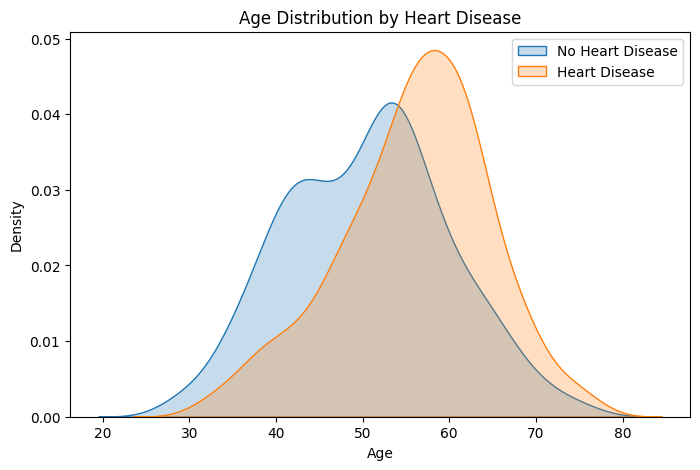

In [177]:
#Density Plot for Age:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.kdeplot(heart_df[heart_df['HeartDisease']==0]['Age'], shade=True, label='No Heart Disease')
sns.kdeplot(heart_df[heart_df['HeartDisease']==1]['Age'], shade=True, label='Heart Disease')
plt.title('Age Distribution by Heart Disease')
plt.legend()
plt.show()
#Shows how age is distributed between affected and non-affected groups.

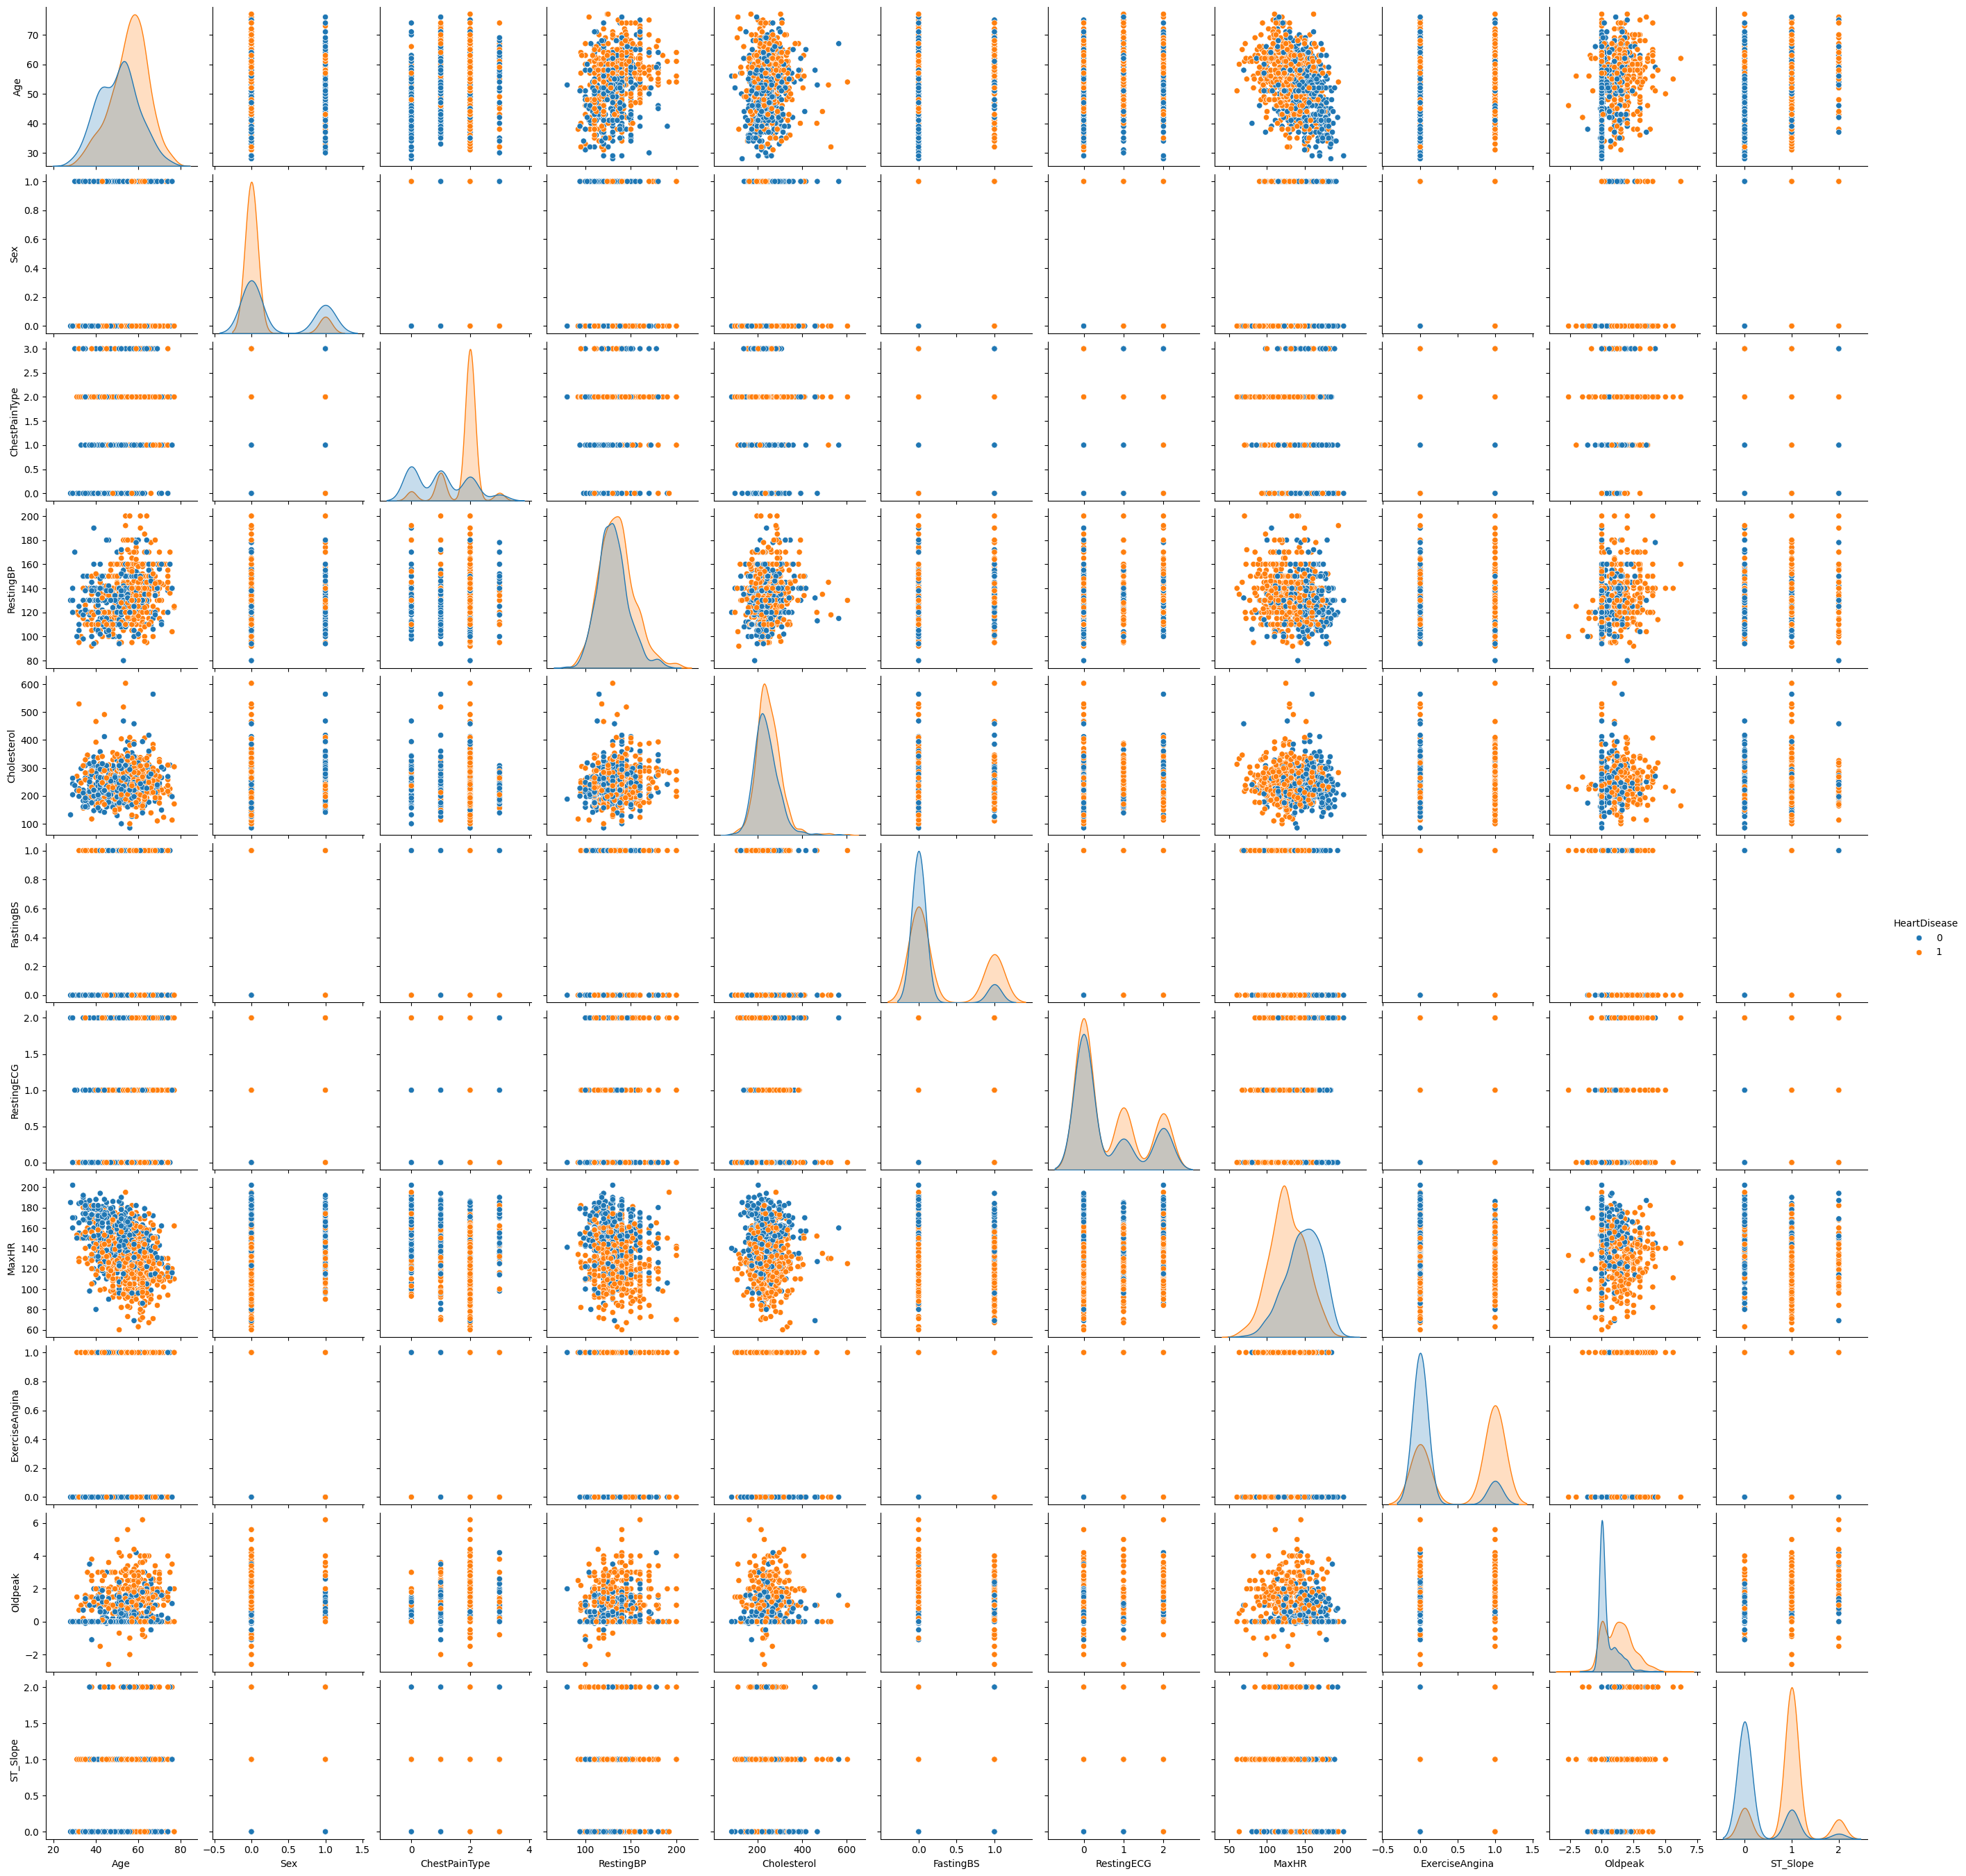

In [178]:
#Pair Plot (Feature Interaction)
sns.pairplot(heart_df, hue='HeartDisease', diag_kind='kde')
#Helps visualize relationships between multiple numerical features

In [179]:
#Scatter Plot for Oldpeak vs. MaxHR
px.scatter(heart_df, x='Oldpeak', y='MaxHR', color='HeartDisease', title='Oldpeak vs MaxHR')
#Identifies trends between ST depression and max heart rate.

Full Correlation Heatmap

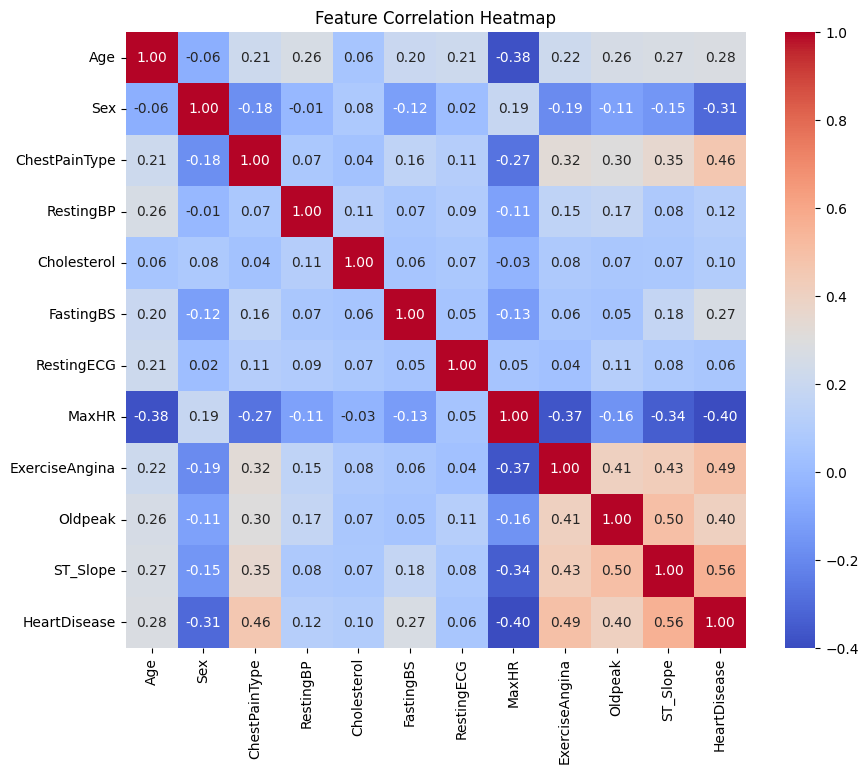

In [210]:
plt.figure(figsize=(10,8))
sns.heatmap(heart_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()
#Gives a full correlation matrix to spot highly correlated variables

In [180]:
#checking the distribution of the target variable
heart_df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


1--> defective haert
0--> healthy heart

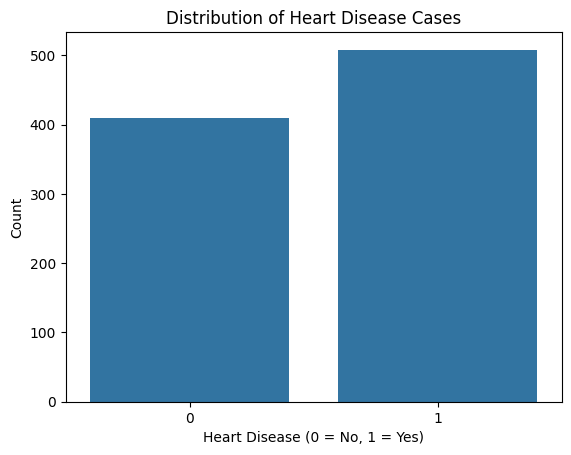

In [181]:
#Lets visualise our target variable to get a clearer picure
sns.countplot(x=heart_df['HeartDisease'])
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

Splitting Features and targets


# **Train text Data split**

In [198]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [199]:
# Define features and target
X = heart_df.drop('HeartDisease', axis=1)
y = heart_df['HeartDisease']

# Split before applying SMOTE (only to training data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distribution after SMOTE:\n", y_train_resampled.value_counts(normalize=True) * 100)


Class distribution after SMOTE:
 HeartDisease
1    50.0
0    50.0
Name: proportion, dtype: float64


After applying SMOTE, yur dataset is now perfectly balanced (50% heart disease cases and 50% no heart disease cases).

**Feature Scaling**

In [203]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


# Debugging: Check if scaling worked
print("Scaled X_train shape:", X_train_resampled_scaled.shape)
print("Scaled X_test shape:", X_test_scaled.shape)




Scaled X_train shape: (812, 11)
Scaled X_test shape: (184, 11)


# Hyperparameter Tuning using F1-score

In [204]:

from sklearn.metrics import f1_score

best_solver = ''
best_f1 = 0

for solver in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
  lr = LogisticRegression(solver=solver, max_iter=500)
  lr.fit(X_train_resampled_scaled, y_train_resampled)
  y_pred = lr.predict(X_test_scaled)
  f1 = f1_score(y_test, y_pred)

  if f1 > best_f1:  # Select the best model based on F1-score
   best_solver = solver
   best_f1 = f1

print(f"Best Solver: {best_solver} with F1-score: {best_f1:.4f}")




Best Solver: newton-cg with F1-score: 0.8627


***

Train the Final Logistic Regression Model

Logistic Regression Accuracy: 0.8478260869565217

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        82
           1       0.86      0.86      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



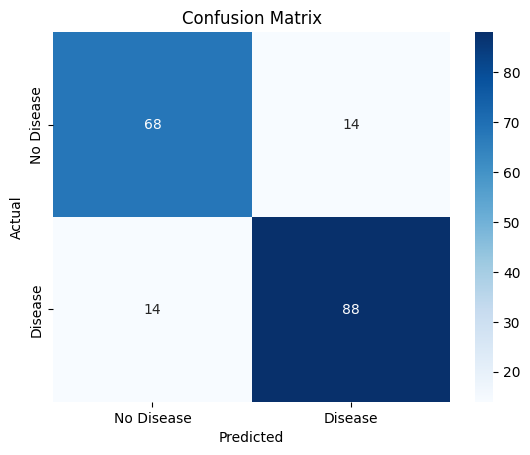

In [205]:
# Train the best Logistic Regression model
lr = LogisticRegression(solver=best_solver, max_iter=500)
lr.fit(X_train_resampled_scaled, y_train_resampled)

# Make predictions
y_pred = lr.predict(X_test_scaled)

# Model evaluation
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [187]:

#Accuracy: The proportion of correctly classified cases.
#Classification Report: Provides Precision, Recall, and F1-score for each class (0 = No Disease, 1 = Disease).
#Confusion Matrix: Shows the number of true positives, true negatives, false positives, and false negatives.

In [207]:
# Create a predictive system
def predict_heart_disease(input_data):
    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)  # Apply feature scaling
    prediction = lr.predict(input_scaled)
    return "Heart Disease Detected" if prediction[0] == 1 else "No Heart Disease"


In [208]:

# Example usage
new_data = [55, 0, 0, 140, 200, 0, 0, 150, 0, 1.2, 1]  # Example input
result = predict_heart_disease(new_data)
print(f"Prediction for the input data: {result}")


Prediction for the input data: No Heart Disease
